In [6]:
import pandas as pd

# Load the merged dataset
# Assuming the dataset is loaded into a DataFrame called df
df = pd.read_csv('Merged Data Akshansh Roy.csv')

# Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

avg_vehicle_count_per_hour = df.groupby('Hour_of_day')['Vehicles'].mean().reset_index()

# Rename columns for clarity
avg_vehicle_count_per_hour.columns = ['Hour_of_day', 'Avg_Vehicle_Count']

# Display the resulting metrics
print(avg_vehicle_count_per_hour)


    Hour_of_day  Avg_Vehicle_Count
0             0          20.790788
1             1          17.259953
2             2          15.126464
3             3          13.011710
4             4          11.438720
5             5          10.688525
6             6          11.319282
7             7          12.862607
8             8          14.306011
9             9          17.078845
10           10          21.555816
11           11          24.351288
12           12          24.939110
13           13          22.453552
14           14          24.085090
15           15          24.071819
16           16          23.350507
17           17          23.268540
18           18          24.556596
19           19          26.210773
20           20          25.913349
21           21          24.508197
22           22          23.846214
23           23          22.439500


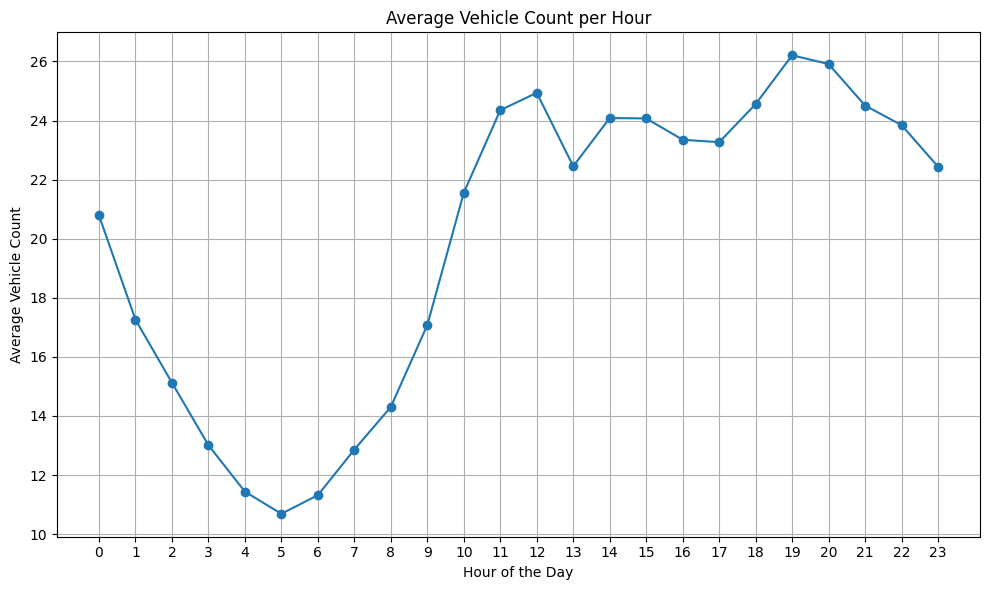

Top Hours of Congestion:
    Hour_of_day   Vehicles
19           19  26.210773
20           20  25.913349
12           12  24.939110


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average vehicle count per hour
avg_vehicle_count_per_hour = df.groupby('Hour_of_day')['Vehicles'].mean().reset_index()

# Plotting the average vehicle count per hour
plt.figure(figsize=(10, 6))
plt.plot(avg_vehicle_count_per_hour['Hour_of_day'], avg_vehicle_count_per_hour['Vehicles'], marker='o', linestyle='-')
plt.title('Average Vehicle Count per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.tight_layout()
plt.show()

# Identify hours with highest congestion (e.g., top 3 hours)
top_hours_congestion = avg_vehicle_count_per_hour.nlargest(3, 'Vehicles')
print("Top Hours of Congestion:")
print(top_hours_congestion)


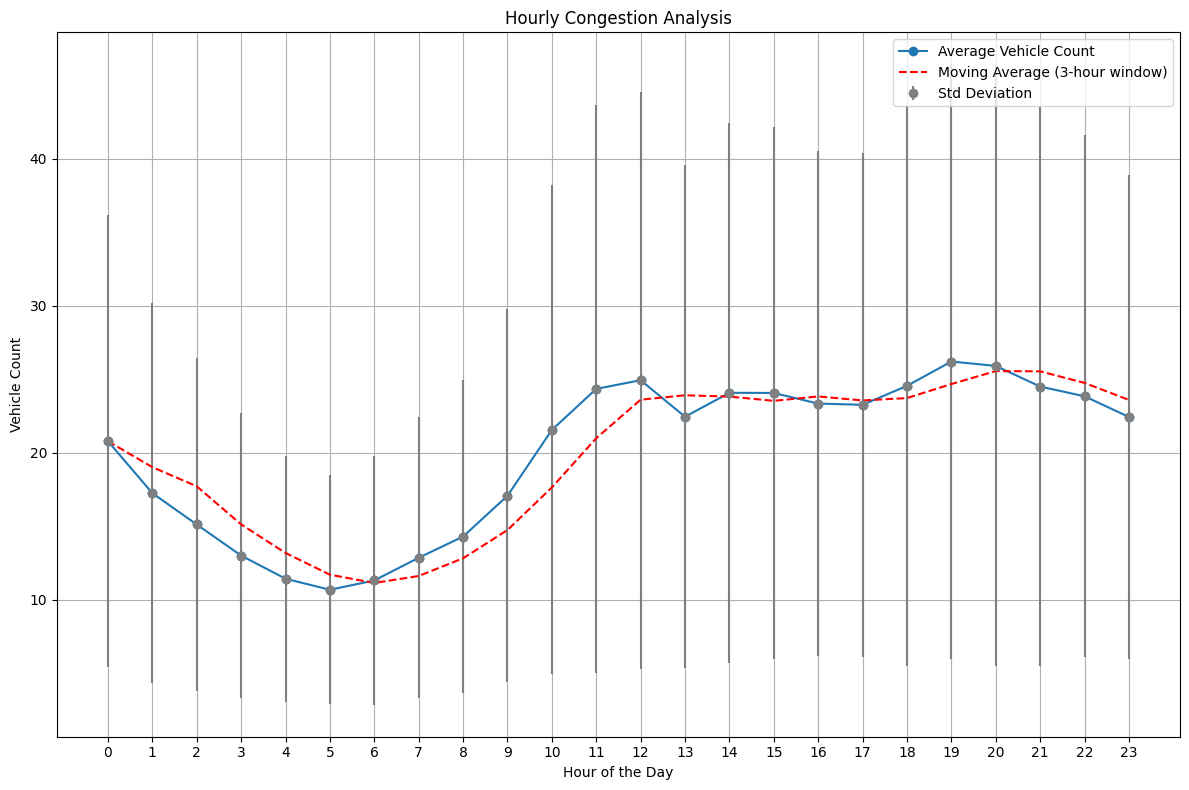

Peak Hours of Congestion:
    Hour_of_day   Vehicles  Moving_Avg
20           20  25.913349   25.560239
21           21  24.508197   25.544106


In [8]:
avg_vehicle_count_per_hour = df.groupby('Hour_of_day')['Vehicles'].mean().reset_index()

# Calculate moving average (e.g., 3-hour window)
avg_vehicle_count_per_hour['Moving_Avg'] = avg_vehicle_count_per_hour['Vehicles'].rolling(window=3, min_periods=1).mean()

# Calculate standard deviation of vehicle counts
std_vehicle_count_per_hour = df.groupby('Hour_of_day')['Vehicles'].std().reset_index()

# Plotting average vehicle count per hour with moving average and standard deviation
plt.figure(figsize=(12, 8))

# Plot average vehicle count per hour
plt.plot(avg_vehicle_count_per_hour['Hour_of_day'], avg_vehicle_count_per_hour['Vehicles'], marker='o', linestyle='-', label='Average Vehicle Count')

# Plot moving average
plt.plot(avg_vehicle_count_per_hour['Hour_of_day'], avg_vehicle_count_per_hour['Moving_Avg'], marker='', linestyle='--', color='red', label='Moving Average (3-hour window)')

# Plot standard deviation as error bars
plt.errorbar(std_vehicle_count_per_hour['Hour_of_day'], avg_vehicle_count_per_hour['Vehicles'], yerr=std_vehicle_count_per_hour['Vehicles'], fmt='o', color='gray', label='Std Deviation')

plt.title('Hourly Congestion Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.tight_layout()
plt.show()

# Identify hours with consistently high vehicle counts (e.g., high moving average and low variability)
peak_hours = avg_vehicle_count_per_hour[avg_vehicle_count_per_hour['Moving_Avg'] > avg_vehicle_count_per_hour['Moving_Avg'].quantile(0.95)]
print("Peak Hours of Congestion:")
print(peak_hours)


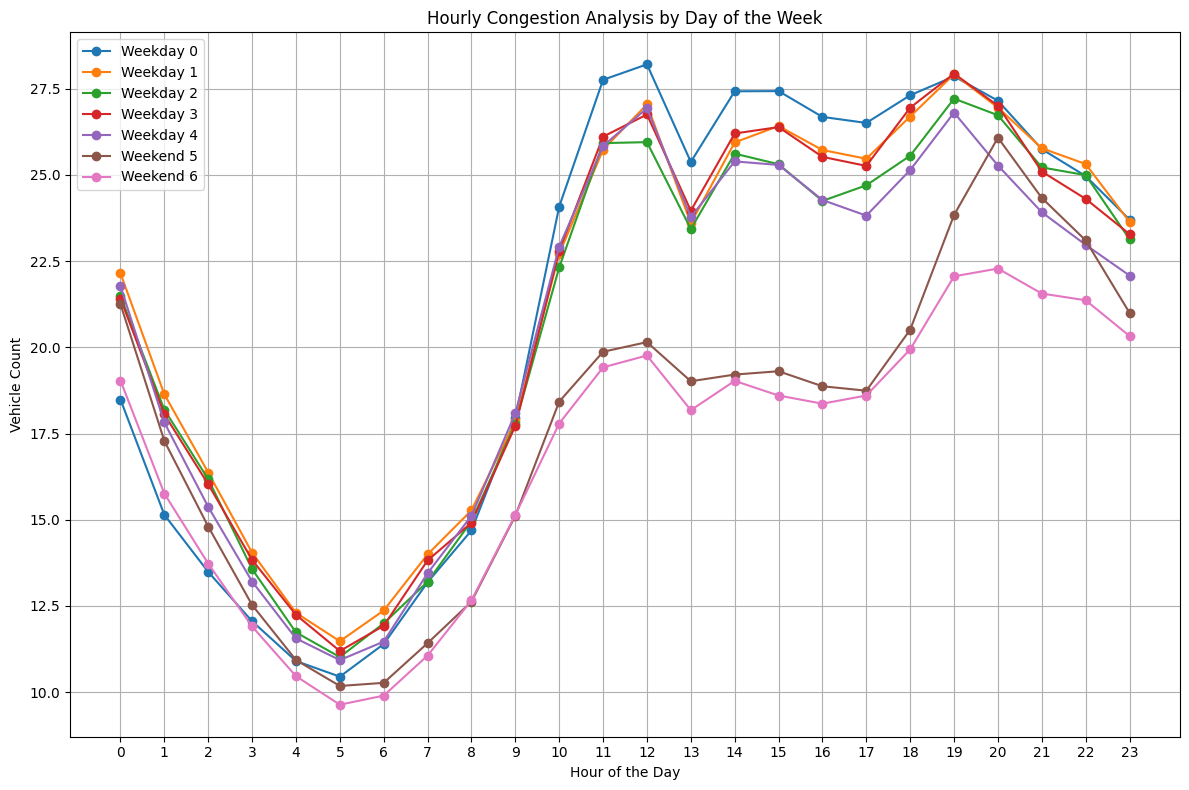

In [9]:
# Calculate average vehicle count per hour and day of the week
avg_vehicle_count_per_hour_day = df.groupby(['Day_of_week', 'Hour_of_day'])['Vehicles'].mean().reset_index()

# Separate data for weekdays (0-4) and weekends (5-6)
weekday_data = avg_vehicle_count_per_hour_day[avg_vehicle_count_per_hour_day['Day_of_week'].isin([0, 1, 2, 3, 4])]
weekend_data = avg_vehicle_count_per_hour_day[avg_vehicle_count_per_hour_day['Day_of_week'].isin([5, 6])]

# Plotting average vehicle count per hour for weekdays and weekends
plt.figure(figsize=(12, 8))

# Plot average vehicle count per hour for weekdays
for day, group_data in weekday_data.groupby('Day_of_week'):
    plt.plot(group_data['Hour_of_day'], group_data['Vehicles'], marker='o', linestyle='-', label=f'Weekday {day}')

# Plot average vehicle count per hour for weekends
for day, group_data in weekend_data.groupby('Day_of_week'):
    plt.plot(group_data['Hour_of_day'], group_data['Vehicles'], marker='o', linestyle='-', label=f'Weekend {day}')

plt.title('Hourly Congestion Analysis by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.tight_layout()
plt.show()


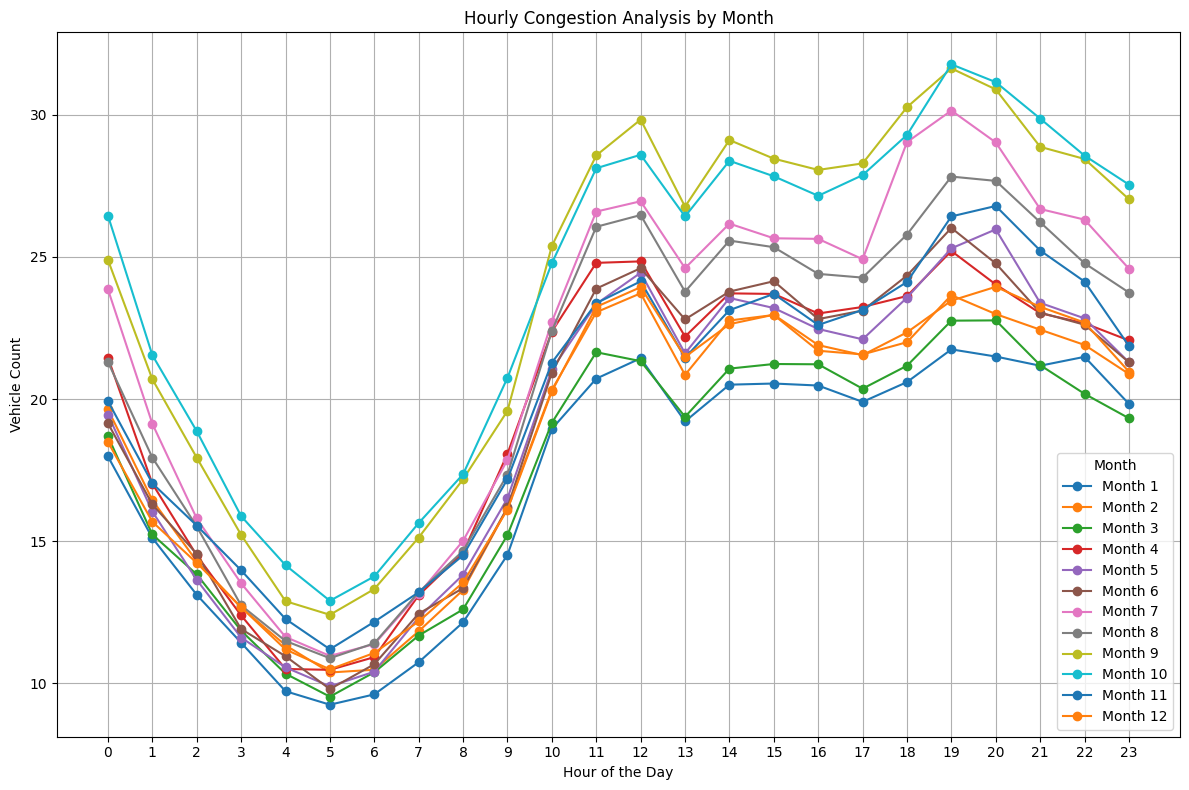

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate average vehicle count per hour and month
avg_vehicle_count_per_hour_month = df.groupby(['Month', 'Hour_of_day'])['Vehicles'].mean().reset_index()

# Plotting average vehicle count per hour for each month
plt.figure(figsize=(12, 8))

# Plot average vehicle count per hour for each month
for month, group_data in avg_vehicle_count_per_hour_month.groupby('Month'):
    plt.plot(group_data['Hour_of_day'], group_data['Vehicles'], marker='o', linestyle='-', label=f'Month {month}')

plt.title('Hourly Congestion Analysis by Month')
plt.xlabel('Hour of the Day')
plt.ylabel('Vehicle Count')
plt.legend(title='Month')
plt.grid(True)
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.tight_layout()
plt.show()


Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'vehicles_min_max',
       'Vehicles_z_score', 'Hour_of_day', 'Day_of_week', 'Month',
       'Vehicles_lag_1hour', 'is_weekend', 'is_special_event', 'event',
       'venue', 'location', 'temperature', 'precipitation', 'humidity',
       'wind_speed'],
      dtype='object')
Correlation Matrix:
               Vehicles  temperature  precipitation  humidity
Vehicles       1.000000    -0.002758      -0.001824  0.003468
temperature   -0.002758     1.000000      -0.004676 -0.004271
precipitation -0.001824    -0.004676       1.000000 -0.002421
humidity       0.003468    -0.004271      -0.002421  1.000000

Correlations with Vehicles:
Vehicles         1.000000
temperature     -0.002758
precipitation   -0.001824
humidity         0.003468
Name: Vehicles, dtype: float64

Intercept: 19.91382200462494
Coefficients: [-0.00456433 -0.010474    0.0028231 ]


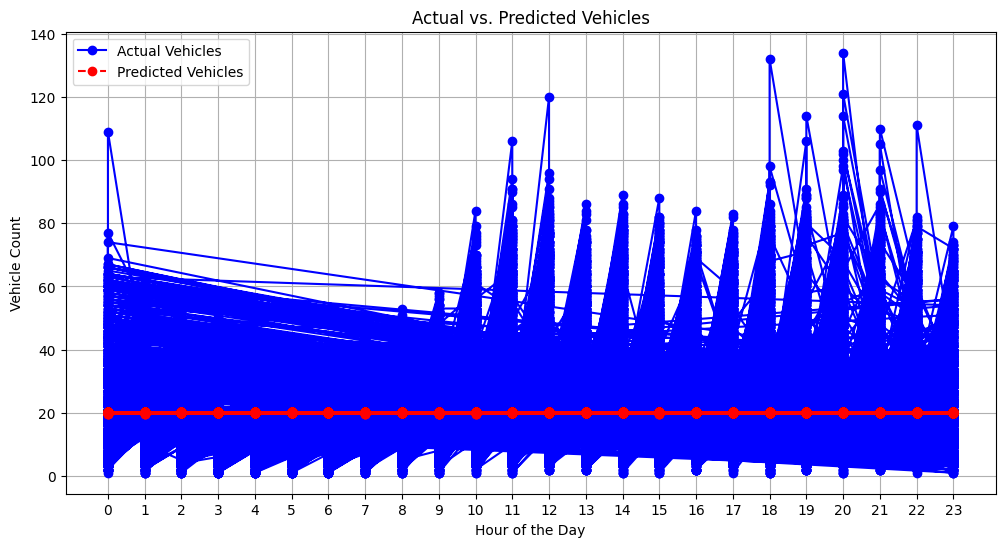

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Merged Data Akshansh Roy.csv')


# Verify columns in your DataFrame
print(df.columns)

# Calculate correlation coefficients
correlation_matrix = df[['Vehicles', 'temperature', 'precipitation', 'humidity']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate correlations with 'Vehicles'
correlation_with_vehicles = correlation_matrix['Vehicles']

# Print correlations with 'Vehicles'
print("\nCorrelations with Vehicles:")
print(correlation_with_vehicles)

# Perform linear regression
X = df[['temperature', 'precipitation', 'humidity']]
y = df['Vehicles']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and intercept
print('\nIntercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Predict Vehicles using the model
df['Predicted_Vehicles'] = model.predict(X)

# Plot actual vs. predicted Vehicles
plt.figure(figsize=(12, 6))
plt.plot(df['Hour_of_day'], df['Vehicles'], marker='o', linestyle='-', color='blue', label='Actual Vehicles')
plt.plot(df['Hour_of_day'], df['Predicted_Vehicles'], marker='o', linestyle='--', color='red', label='Predicted Vehicles')
plt.title('Actual vs. Predicted Vehicles')
plt.xlabel('Hour of the Day')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.show()


Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'vehicles_min_max',
       'Vehicles_z_score', 'Hour_of_day', 'Day_of_week', 'Month',
       'Vehicles_lag_1hour', 'is_weekend', 'is_special_event', 'event',
       'venue', 'location', 'temperature', 'precipitation', 'humidity',
       'wind_speed', 'Predicted_Vehicles'],
      dtype='object')


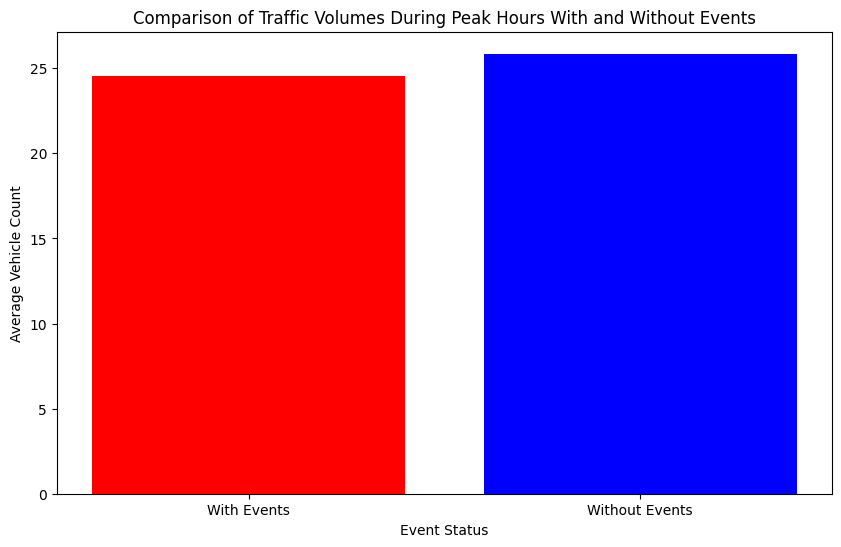

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Verify columns in your DataFrame
print(df.columns)

# Identify peak hours based on the average vehicle count per hour
avg_vehicle_count_per_hour = df.groupby('Hour_of_day')['Vehicles'].mean().reset_index()

# Consider peak hours as the top 3 hours with the highest average vehicle count
peak_hours = avg_vehicle_count_per_hour.nlargest(3, 'Vehicles')['Hour_of_day'].values

# Separate data into two groups: with events and without events
with_events = df[(df['is_special_event'] == 1) & (df['Hour_of_day'].isin(peak_hours))]
without_events = df[(df['is_special_event'] == 0) & (df['Hour_of_day'].isin(peak_hours))]

# Calculate average vehicle count during peak hours for each group
avg_with_events = with_events.groupby('Hour_of_day')['Vehicles'].mean().mean()
avg_without_events = without_events.groupby('Hour_of_day')['Vehicles'].mean().mean()

# Prepare data for plotting
labels = ['With Events', 'Without Events']
avg_vehicle_counts = [avg_with_events, avg_without_events]

# Plot the comparison using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, avg_vehicle_counts, color=['red', 'blue'])
plt.title('Comparison of Traffic Volumes During Peak Hours With and Without Events')
plt.xlabel('Event Status')
plt.ylabel('Average Vehicle Count')
plt.show()
